
# Project: Investigate the TMDB-MOVIES DATASET 3


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be analyzing data associated with the TMDb-movies. The data set contains information of about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue.In particular, we will be finding trends or patterns on what led to high revenue and which factors played a major role. The dataset has 10,866 rows and 21 columns. Some columns contain null values which will be investigated.  


### Question(s) for Analysis
1. How does the budget of each movie correlate with revenue?
2.What is the correlation between the runtime and revenue?
3.According to the duration of the movies, which is the most liked by audiences according to popolarity?
4.:What Kind Of Properties Are Associated With Movies With High Revenue?

In [1]:

# imported all the important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In the above cell, i have imported all the packages needed.

In [43]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas 
#== 0.25.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 4.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.0
    Uninstalling pandas-0.25.0:
      Successfully uninstalled pandas-0.25.0



## Data Wrangling


In this stage, i gathered the data, assessed the data to identify any problems in the data's quality and then cleaned it by modifying , replacing and removing data to ensure it is of high quality.

In [2]:


#pd.options.display.max_rows = 11000

imdb = pd.read_csv('/content/tmdb-movies.csv')
imdb.head()
#print(imdb.head) 


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 In the above cell,i have loaded my dataset(TMDb-Movies)
#import pandas as pd
Inspected the first few rows of my dataset

In [3]:
#inspecting the last three rows of the dataset
imdb.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#summary of the dataset
imdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

 

In data cleaning, I was able to check for missing values in the dataset and filled with zero, removed duplicates and changed the datatype for date.

In [6]:

#missing values
#count total rows in each column which contain null values
imdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#fill the null values with zero using 'fillna' function
imdb.fillna(0)
imdb.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
#remove the duplicates
sum(imdb.duplicated())

1

In [9]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
imdb.drop_duplicates(inplace = True)


In [10]:
#after droping the duplicates we get to see that the rows have decreased by one.. 
# new rowsize is 10865 and columns remain 21
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [11]:
#changing the datatype of the release_date
imdb['release_date'] = pd.to_datetime(imdb['release_date'])

In [12]:
#from this you can see the datatype of column 'release_date' has changed from string to datetime which is required.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

In [13]:
#as we can see, our dataset has 21 columns
#drop the columns that we do not need
imdb.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)


In [14]:
#from this cell, we can see the new column size of the dataset is 15
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   keywords              9372 non-null   object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

EXPLORATORY DATA ANALYSIS



### How does the budget of each movie correlate with revenue?

Text(0.5, 0.98, 'Distribution of the dataset')

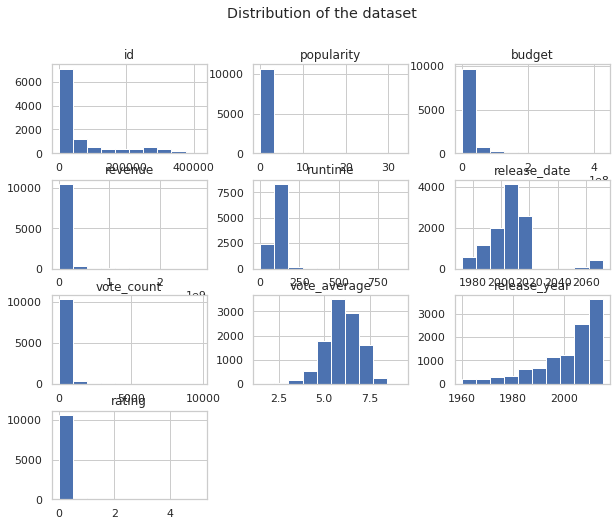

In [45]:
#plot of the whole dataset
imdb.hist(figsize = (10,8))
plt.suptitle('Distribution of the dataset')

I).WHICH MOVIES HAVE THE HIGHEST VIEWS?

In [16]:
#movies with the highest views

imdb['popularity'].value_counts()

0.557155    2
0.214587    2
0.187319    2
0.060425    2
0.078482    2
           ..
0.430790    1
0.429826    1
0.424885    1
0.424880    1
0.035919    1
Name: popularity, Length: 10814, dtype: int64

In [17]:
df1 = imdb.groupby(by = 'popularity')

In [18]:
print(df1)

In [19]:
df2 = imdb.sort_values('popularity', ascending = False).sample(20)

In [20]:
df2.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1065,258893,0.256655,0,0,Scooby-Doo! WrestleMania Mystery,Matthew Lillard|Grey Griffin|Frank Welker|Fran...,Brandon Vietti,NaN,84,Animation|Comedy|Family|Mystery,WWE Studios|Warner Bros. Feature Animation,2014-03-25,24,6.2,2014
8534,20762,0.541018,0,0,The Substitute,Tom Berenger|Raymond Cruz|Marc Anthony|William...,Robert Mandel,NaN,114,Action|Thriller,Live Entertainment,1996-04-19,28,5.9,1996
9090,10223,0.375026,0,0,A Simple Plan,Bill Paxton|Bridget Fonda|Billy Bob Thornton|B...,Sam Raimi,brother brother relationship|money delivery|ai...,121,Thriller,Paramount Pictures,1998-12-11,69,6.5,1998
10007,12157,0.589500,0,29888235,Green Card,GÃ©rard Depardieu|Andie MacDowell|Bebe Neuwirt...,Peter Weir,immigration|greenhouse|love|green card,108,Comedy|Drama|Romance,Touchstone Pictures,1990-12-23,42,5.7,1990
8150,9061,0.514668,0,0,Just Cause,Sean Connery|Laurence Fishburne|Blair Underwoo...,Arne Glimcher,rape|black people|florida|professor|harvard un...,102,Action|Drama|Mystery|Thriller,Fountainbridge Films|Warner Bros.|Lee Rich Pro...,1995-02-17,69,6.1,1995


Text(0.5, 1.0, 'POPZ')

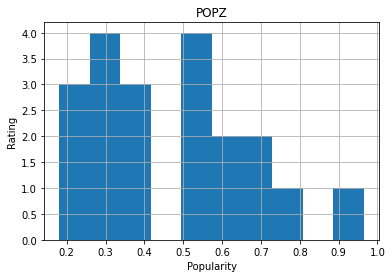

In [21]:
df2['popularity'].hist()

plt.xlabel("Popularity")
plt.ylabel("Rating")
#plt.legend(legend)
plt.title('POPZ')


In [22]:
#new feature
imdb['rating']= imdb['popularity'] / imdb['vote_average']

imdb['rating']

0        5.074733
1        4.002808
2        2.081350
3        1.489747
4        1.278769
           ...   
10861    0.010892
10862    0.011499
10863    0.010022
10864    0.011911
10865    0.023946
Name: rating, Length: 10865, dtype: float64

In [23]:
imdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,rating
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,0.105437
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,0.146237
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000011
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.035941
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.067098
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,0.121595
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,5.074733


In [24]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   keywords              9372 non-null   object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

In [25]:
df3 = imdb.sort_values('rating', ascending = False).sample(20)

df3.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,rating
2512,17771,0.390862,0,0,Sunshine,Ralph Fiennes|William Hurt|Rachel Weisz|Miriam...,IstvÃ¡n SzabÃ³,holocaust|jewish life|russian front,181,Drama|History,Channel Four Films|Dor Film Produktionsgesells...,1999-09-13,12,4.8,1999,0.081430
645,98566,5.787396,125000000,477200000,Teenage Mutant Ninja Turtles,Megan Fox|Will Arnett|William Fichtner|Alan Ri...,Jonathan Liebesman,martial arts|terrorist|subway|hero|mutation,101,Science Fiction|Action|Adventure|Fantasy|Comedy,Paramount Pictures|Nickelodeon Movies|Platinum...,2014-08-07,1836,5.8,2014,0.997827
7186,9953,0.244611,0,1841260,A Love Song for Bobby Long,John Travolta|Scarlett Johansson|Gabriel Macht...,Shainee Gabel,alcohol|new orleans|book|friendship|house,119,Drama,Yari Film Group,2004-09-02,56,6.7,2004,0.036509
8277,9869,0.685325,45000000,178051587,Patriot Games,Harrison Ford|Anne Archer|Patrick Bergin|Thora...,Phillip Noyce,assassination|assassin|repayment|ira|jack ryan,117,Drama|Action|Thriller|Crime,Paramount Pictures|Mace Neufeld Productions,1992-06-04,219,6.0,1992,0.114221
2750,9104,0.427146,15000000,0,Buffalo Soldiers,Joaquin Phoenix|Ed Harris|Scott Glenn|Anna Paq...,Gregor Jordan,germany|corruption|sex|based on novel|investig...,98,Drama|Comedy|War|Crime|Thriller,Grosvenor Park Films LLP|Film4|Good Machine,2001-09-08,45,6.6,2001,0.064719


if its highly viewed does it mean it has to be highly rated

relationship between budget and revenue
if we reduce budget does the movie be lowly rated
if we increase budget will the movie bring high revenue

Text(0.5, 1.0, 'Budget vs Rating')

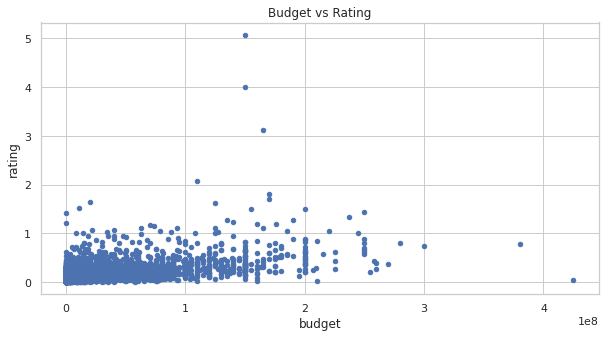

In [44]:
# scatterplot- bivariate analysis
imdb.plot.scatter(x ='budget', y = 'rating')
plt.title('Budget vs Rating')
# outliers are values that are extremely high compared to the others 
#outliers don't follow trend

In [27]:
imdb.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,rating
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,0.105437
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,0.146237
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000011
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.035941
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.067098
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,0.121595
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,5.074733


from this summary statistics, we can see/conclude the higher the budget means the movie will be of high quality, therefore the ratings will increase.Hence, the revenue is high..this can be seen in the 'max' row.

In [28]:
imdb.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id              6.606637e+04
popularity      6.464456e-01
budget          1.462429e+07
revenue         3.982690e+07
runtime         1.020718e+02
vote_count      2.173996e+02
vote_average    5.975012e+00
release_year    2.001322e+03
rating          1.054369e-01
dtype: float64

QUESTION 2:What is the correlation between the runtime and revenue? 

In [29]:
#what are the movies with the shortest and longest runtime
#find the movie with longest and shortest runtime.
#use the function 'idxmin' to find the index of lowest runtime movie.
#use the function 'idxmax' to find the index of Highest runtime movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'numin' to find the index of lowest runtime movie.
    min_index = imdb[x].idxmin()
    #use the function 'numax' to find the index of Highest runtime movie.
    high_index = imdb[x].idxmax()
    high = pd.DataFrame(imdb.loc[high_index,:])
    low = pd.DataFrame(imdb.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",imdb['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",imdb['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('runtime')

Movie Which Has Highest runtime :  The Story of Film: An Odyssey
Movie Which Has Lowest runtime  :  Mythica: The Necromancer


,3894,92
id,125336,370687
popularity,0.006925,1.876037
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Mythica: The Necromancer
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...
director,Mark Cousins,A. Todd Smith
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,sword|magic|sorcery|necromancer
runtime,900,0
genres,Documentary,Fantasy|Action|Adventure


from the above function, the first column shows the movie with the highest runtime which is The Story of Film: An Odyssey with a runtime of 900minutes and the second column shows the movie with the shortest runtime which is Fresh Guacamolewith a runtime of 2 minutes.

In [30]:
#find the movie with highest and lowest earned revenue
#use 'find_minmax' function which i made earlier
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


from the above cell,the first column shows the movie with highest revenue of 2.7 Billion while the second column shows shows the movie with the lowest revenue in the dataset.

Text(0.5, 1.0, 'Runtime vs Revenue')

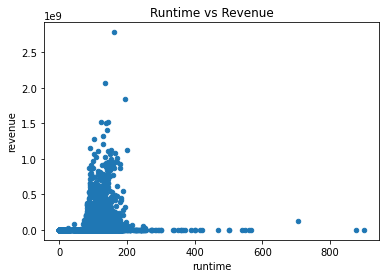

In [32]:
#the relationship between runtime and revenue 
imdb.plot.scatter(x ='runtime', y = 'revenue')
plt.title('Runtime vs Revenue')


positive correlation between the two variable..thus as the runtime increases , the revenue also increases

QUESTION 3: According to the duration of the movies, which is the most liked by audiences according to popolarity?

In [33]:
#use the group by function to group the runtime column then get the mean to the popularity then plot
imdb.groupby('runtime')['popularity'].mean()

runtime
0      0.186411
2      0.223623
3      0.191549
4      0.420610
5      0.439412
         ...   
561    0.000065
566    0.147489
705    0.537593
877    0.469332
900    0.006925
Name: popularity, Length: 247, dtype: float64

Text(0, 0.5, 'Average Popularity')

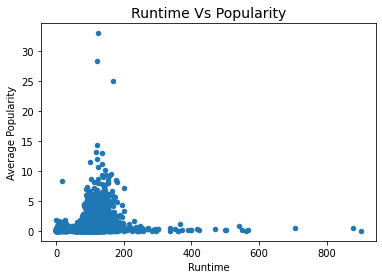

In [34]:
imdb.plot.scatter(x ='runtime', y = 'popularity')
#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 10)
plt.ylabel('Average Popularity',fontsize = 10)

From the above plot, we can see the movies from 0-200 runtime are more popular. This is because watching movies for a long period of time can be boring.
Positive correlation

QUESTION 4:What Kind Of Properties Are Associated With Movies With High Revenue?

In [35]:
info = pd.DataFrame(imdb['revenue'].sort_values(ascending=False).sample(20))
data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in data_set:
    info[i] = imdb[i]
info.head(3)

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,vote_average,release_year
3951,108846072,590,1.176810,25000000,The Hours,Nicole Kidman|Julianne Moore|Meryl Streep|Step...,Stephen Daldry,114,Drama,6.7,2002
1922,327803731,44214,5.293180,13000000,Black Swan,Natalie Portman|Mila Kunis|Vincent Cassel|Barb...,Darren Aronofsky,108,Drama|Mystery|Thriller,7.1,2010
1828,0,19139,0.149553,0,Goal! III: Taking On The World,Kuno Becker|Leo Gregory|J. J. Feild,Andrew Morahan,91,Drama,3.5,2009


investigating the above factors against revenue to see the how they related and how it affects it

Text(0, 0.5, 'Revenue')

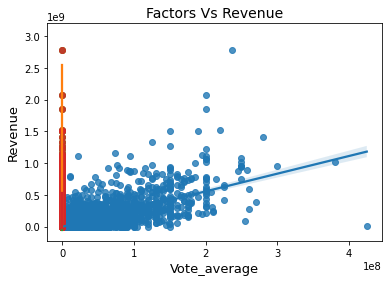

In [36]:
sns.regplot(x='budget', y = 'revenue',data=imdb);
sns.regplot(x='popularity', y = 'revenue',data=imdb);
sns.regplot(x='vote_average', y = 'revenue',data=imdb);
sns.regplot(x='runtime', y = 'revenue',data=imdb);
#axes.scatter(imbd['revenue'],imdb['vote_average'])
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Factors Vs Revenue",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.xlabel('Budget',fontsize = 13)
plt.xlabel('Popularity',fontsize = 13)
plt.xlabel('Vote_average',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)

The above graph shows how various factors have affected revenue. The below graphs have explained each factor one by one.

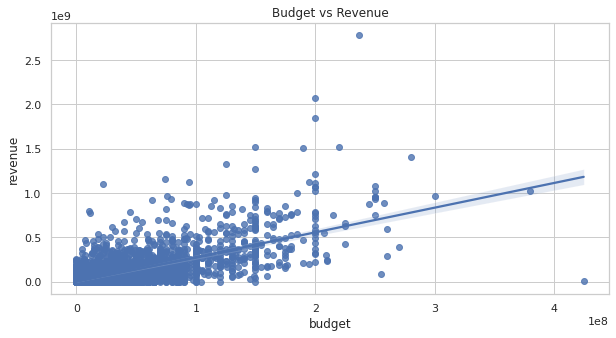

In [38]:
#Relationship between budget and Revenue
sns.regplot(x='budget', y = 'revenue',data=imdb).set(title = 'Budget vs Revenue');
#axes.scatter(imdb['revenue'],imdb['budget'])
sns.set_style("whitegrid")




CONCLUSION: Revenue is positively correlated to budget. Movies with higher budgets have shown an increase in the revenue.

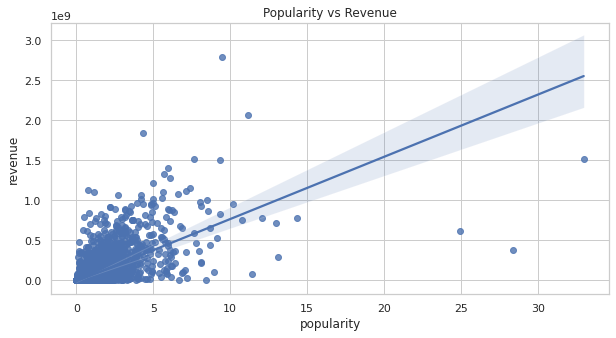

In [39]:
#Relationship between popularity and revenue
sns.regplot(x='popularity', y = 'revenue',data=imdb).set(title = 'Popularity vs Revenue');
#axes.scatter(imdb['revenue'],imdb['popularity'])
sns.set_style("whitegrid")




CONCLUSION: The two variables are positively correlated hence revenue increased with increment of popularity.

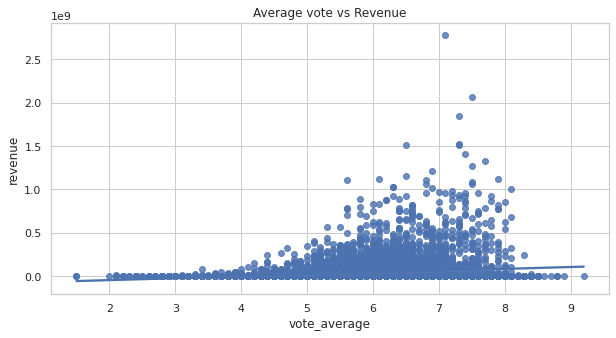

In [41]:
#Relationship between Vote Average and Revenue
sns.regplot(x='vote_average', y = 'revenue',data=imdb).set(title = 'Average vote vs Revenue');
#axes.scatter(imdb['revenue'],imdb['vote_average'])
sns.set_style("whitegrid")



CONCLUSION: Vote Average and Revenue are not highly correlated.

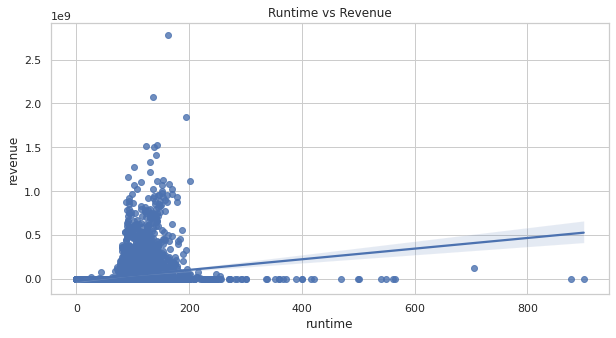

In [42]:
#Relationship between Runtime and Revenue
sns.regplot(x='runtime', y = 'revenue',data=imdb).set(title = 'Runtime vs Revenue');
#axes.scatter(imdb['revenue'],imdb['runtime'])
sns.set_style("whitegrid")



CONCLUSION: Runtime and Revenue are positively correlated.

<a id='conclusions'></a>
## Conclusions

1. Revenue is directly associated with budget.They have a positive correlation between them. This means movies with higher budgets have shown a corresponding increase in the revenue.

2. Short or long duration movies are more popular than long duration of movies. 

3. Runtime is positively correlated with Revenue .This means an increase in runtime means revenue increases.

4. Popularity Vs Revenue: Their is a positive correlation between the two variables thus revenue increased with increment of popularity. If ta movie popularity is higher, then the revenue is high.

5. Vote Average is not highly correlated to Revenue.








LIMITATIONS 1.Missing data - This has affected the interpretation of the results.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255